In [ ]:
# In the linked file there are 100 (x,y) points. Given these data find the slope 
#and the intercept of the line which best fits them. Round your answers to the 
# nearest hundredth.

### Import all the required libraries 

In [83]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

### Load Data

In [81]:
user_col = ['x','y']
f = pd.read_csv('https://www.pivigo.com/challenge_data/regression_data.csv', sep=',', header=None, names = user_col)

### explore

In [176]:
f.head()

,x,y
0,6.292929,33.029204
1,20.434343,94.117665
2,20.939394,94.286240
3,5.282828,30.425881
4,3.010101,21.471686


In [85]:
f.describe()

,x,y
count,100.000000,100.000000
mean,14.500000,70.133720
std,7.326134,31.704608
min,2.000000,11.399703
25%,8.250000,41.402437
50%,14.500000,71.263401
75%,20.750000,95.646222
max,27.000000,133.348666


### Plot

Text(0, 0.5, 'y')

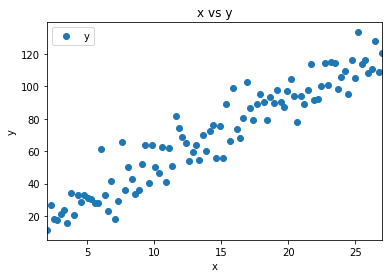

In [88]:
f.plot('x','y', style ='o')
plt.title('x vs y')
plt.xlabel('x')
plt.ylabel('y')

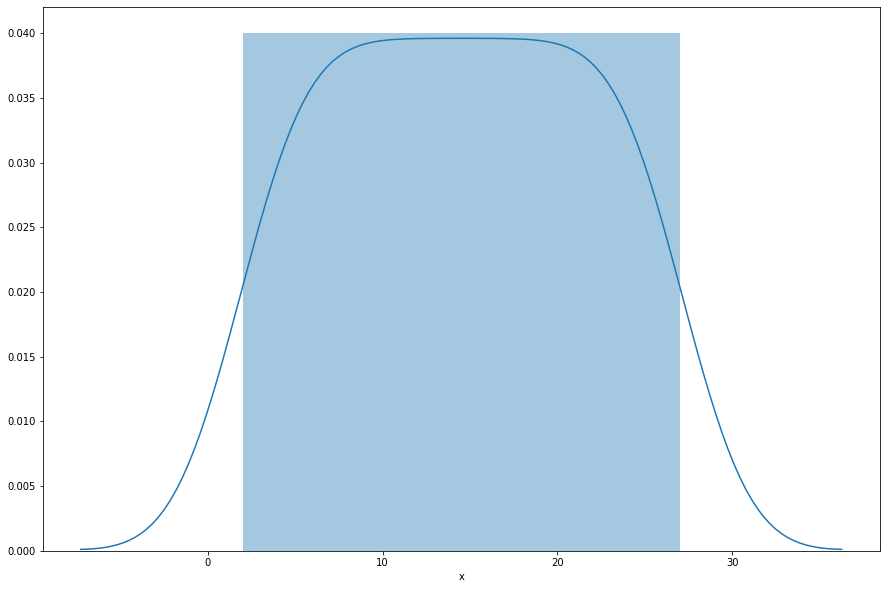

In [91]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(f['x'])

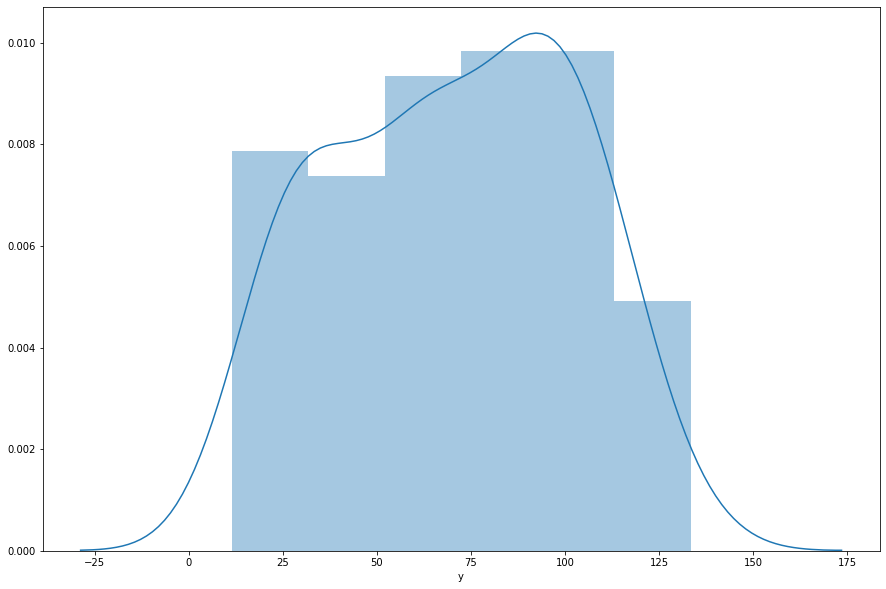

In [92]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(f['y'])

### Label the data 

In [93]:
X = f['x'].values.reshape(-1,1)
y = f['y'].values.reshape(-1,1)

### Split the data 

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Train the data 

In [96]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### OLS Regression Results statsmodel

In [234]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula='X ~ y ', data=data).fit()

lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      X   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     909.7
Date:                Sat, 28 Sep 2019   Prob (F-statistic):           2.16e-51
Time:                        01:24:40   Log-Likelihood:                -224.01
No. Observations:                 100   AIC:                             452.0
Df Residuals:                      98   BIC:                             457.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8979      0.560     -1.604      0.112      -2.009       0.213
y              0.2196      0.007     30.161      0.000       0.205       0.234
==============================================================================
Omnibus:                        3.933   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.140   Jarque-Bera (JB):                3.468
Skew:                          -0.451   Prob(JB):                        0.177
Kurtosis:                       3.140   Cond. No.                         187.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [236]:
lm1.rsquared

0.9027478780751877

#### Intercept 

In [171]:
import math
df = regressor.intercept_
#df = pd.DataFrame(df)
df

array([9.11161953])

#### Slope

In [174]:
d = regressor.coef_
d

array([[4.22186629]])

###### This means that for every one unit of change in x, the change in the y is about 4.23 units

#### nearest to hundredth

In [172]:
# https://realpython.com/python-rounding/#rounding-up
def round_up(n, decimals=0):
    multiplier = 10 ** decimals
    return math.ceil(n * multiplier) / multiplier

In [173]:
round_up(df,2)

9.12

In [175]:
round_up(d,2)

4.23

#### Prediction

In [177]:
y_pred = regressor.predict(X_test)

#### Comparing the actual output values for X_test with the predicted values

In [178]:
dt = pd.DataFrame({'Actural':y_test.flatten(),'Predicted':y_pred.flatten()})

In [179]:
dt

,Actural,Predicted
0,108.851132,122.035882
1,90.082806,91.118174
2,94.286240,97.514941
3,78.065920,96.448813
4,113.959291,100.713325
5,68.615176,60.200466
6,33.251843,45.274676
7,115.957357,117.771370
8,67.986421,78.324640
9,23.485911,22.885991


#### visualize comparison result

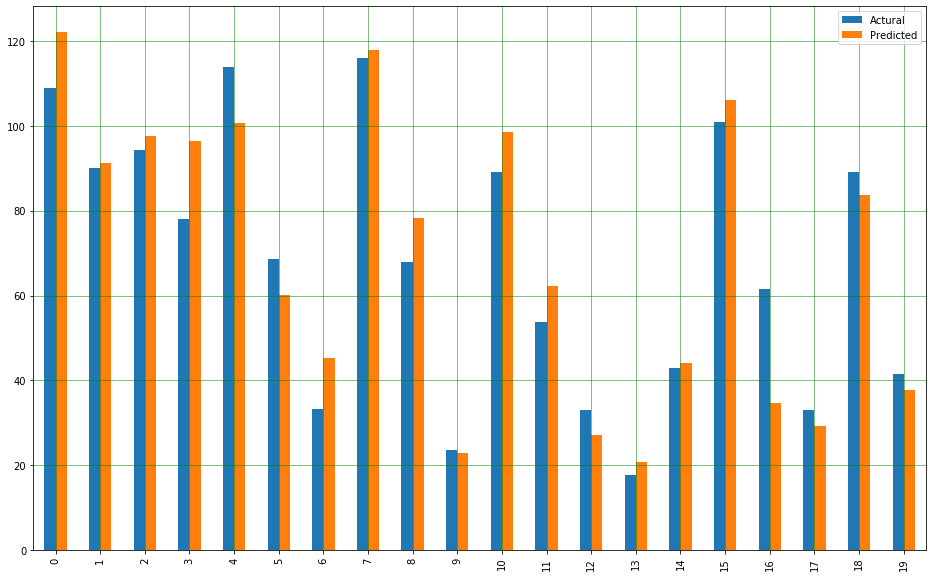

In [183]:
df1 = dt.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Ploting the best fit line 

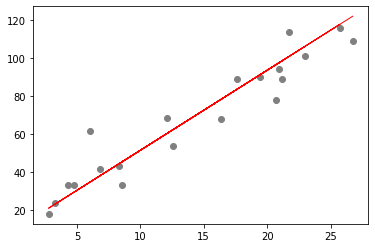

In [185]:
plt.scatter(X_test,y_test,color='gray')
plt.plot(X_test,y_pred, color = 'red', linewidth = 1)

#### Evaluate the performance of the algorithm

In [191]:
print('Mean Absolute error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean squared error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean squared error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute error: 7.771699561189647
Mean squared error: 101.94866465614047
Root Mean squared error: 10.09696314027839


In [230]:
#https://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/